# Computer Vision - Transfer Learning and FCNNs

### Trinity 2021 - Week 7 - 2021.06.08
### Lucas Kruitwagen
DPhil, Geography and the Environment, Smith School of Enterprise and the Environment
#### lucas.kruitwagen@gmail.com
#### @lucaskruitwagen
#### https://github.com/Lkruitwagen

## Contents - Week 7

1. Advances in CNNs

1. Transfer Learning

1. Let's code! TF + transfer learning

1. FCNNs

1. Let's code! TF + transfer learning + FCNNs

1. Tutorial: Machine Learning Experiments

## Advances in CNNs

Where we left off...

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/convolve_math.gif" alt="drawing" style="display:inline" width="500"></img>

We saw that convolution with machine-learned filters was the leading method for solving computer vision classification problems.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/imagenet.png" alt="drawing" style="display:inline" width="400"></img>

**AlexNet 2012**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/alexnet.png" alt="drawing" style="display:inline" width="800"></img>

Contribution:
- GPU training
- Paralellised GPU training
- ReLU Activation + dropout

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." Advances in neural information processing systems 25 (2012): 1097-1105.

**VGG-16, -19 2014**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/vgg16.png" alt="drawing" style="display:inline" width="800"></img>

Contribution:
- Acheiving deeper representations by stacking convolutional layers

Simonyan, K., & Zisserman, A. (2015). *Very Deep Convolutional Networks for Large-Scale Image Recognition*

**Inception (GoogLeNet) 2014**

| Inception cell | Inception Architecture |
| -------------- | ---------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/googlenet_cell.png" alt="drawing" style="display:inline" width="400"></img> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/googlenet_arch.png" alt="drawing" style="display:inline" width="800"></img> |


Contribution:
- First paper to start explicitly using 'block'-based architectures. 
- 1x1 convolution an early precurser to grouped convolutions
- pooled, 1x1, 3x3, 5x5 concatenated features very flexible to spatial-semantic tradeoffs.

Szegedy, C., Lui, W., Jia, Y., et al. (2014) *Going Deeper with Convolutions*.

**ResNet 2015**

| ResNet cell | ResNet Architecture |
| -------------- | ---------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/resnet_cell.png" alt="drawing" style="display:inline" width="400"></img> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/resnet_arch.png" alt="drawing" style="display:inline" width="800"></img> |

Contribution:
- Residual skip-connections solves the degradation problem of deeper networks
- Popularised batch normalisation

He, K., Zhang, X., Ren, S., and Sun, J. (2015) *Deep Residual Learning for Image Recognition*.

_Aside: What is batch normalisation?_

Batch normalisation layers are put after convolutional layers to normalise each batch during training to a given mean and variance. The subsequent layer always receives, as input, data with the same $\mu$ and $\sigma$. This has the effect of:
- stabilising training. A smaller batch size and/or larger learning rate can then be used.
- regularisation. Because data extremes are muted between batches, the model is less overfitted.

**ResNeXt 2017**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/resnext_cell.png" alt="drawing" style="display:inline" width="600"></img>


Contribution:
- Implemented "cardinal" scaling withing blocks (similar to "parallel towers" from Inception)
  - a classic machine learning concept whereby employing an ensemble leads to specialisation

Xie, S., Girshick, R., Dollár, P., Tu, Z., and He, K. (2017) *Aggregated Residual Transformations for Deep Neural Networks*.

These networks represent a fairly stable paradigm. Iterations then turned to hyperparameter tuning:

**DenseNet 2018**

| DenseNet cell | DenseNet Architecture |
| -------------- | ---------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/densenet_cell.png" alt="drawing" style="display:inline" width="400"></img> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/densenet_arch.png" alt="drawing" style="display:inline" width="800"></img> |

Contribution:
- Concatenation of lower-level features, enabling a reduction in kernel dimension

Huang, G., Liu, Z., van der Maaten, L., & Weinberger, K. Q. (2018) *Densely Connected Convolutional Networks*.

**AmoebaNet 2019**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/amoebanet.png" alt="drawing" style="display:inline" width="800"></img>

Contribution:
- Use of reinforcement learning to discover an optimal CNN architecture

Real, E., Aggarwal, A., Huang, Y., & Le, Q. V. (2019) *Regularized Evolution for Image Classifier Architecture Search*.

**EfficientNet 2020**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/efficientnet.png" alt="drawing" style="display:inline" width="800"></img>

Contribution:
- Novel network discovery and uniform scaling factor for width, depth, and resolution

Tan, M., & Le, Q. V. (2020) *EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks*

*Performance comparison:*

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/cnn_performance.png" alt="drawing" style="display:inline" width="400"></img>


finally...

Transformers!

**ViT 2020**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/vit.gif" alt="drawing" style="display:inline" width="400"></img>


Contribution:
- Successfully applied transformers making use of attention to computer vision
- Bigger is better. 300mn images pretraining, 632mn parameters

Dosovitskiy, A., Beyer, L., Kolesnikov, A., et al. (2020) *An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale*

That's all well and good, but how can I use any of this with my own data? I only have 10 samples???

~~10~~ 100?

~~100~~ 1,000?

~~1,000~~ 10,000?

## Transfer Learning

With transfer learning, we _pretrain_ a model in one domain, and then _transfer_ the model's knowledge of that domain to another. _Finetuning_ in the new domain leads to a model with improved generaliseability and performance.

We typically do this when we have a shortage of data in our target domain (e.g. labelled images of dog breeds), but a surplus of images in a similar domain (e.g. labelled images of animal types). We can transfer a model's learned knowledge of animal types to the problem of predicting dog breeds.

In practise, you will almost always start with a pretrained model - you wouldn't want to train VGG-19 yourself.

This means that you can begin many problems from the baseline of a model trained for many days by Microsoft, Google, or Oxford academics.

Very common practise with applications in computer vision and NLP.

There are many domain transfer and training tricks, but let's leave those for now.

## Let's Code! TF + Transfer Learning

Let's return to our Flowers problem. We had a dataset of 3,670 real pictures of flowers classified into one of five categories. With a basic AlexNet we quickly acheived a classifier accuracy of ~50%. Let's see if using transfer learning improves our outcome.

In [1]:
import os, sys, glob                  # some built-ins 
from random import shuffle            # shuffle a list of elements in-place

from PIL import Image                 # image manipulation
import requests                       # http requests
import matplotlib.pyplot as plt       # visualisation
import numpy as np                    # data maniputlations
from scipy.signal import convolve2d   # to demo convolution
from sklearn.metrics import confusion_matrix
from skimage.io import imread         # read an image to a np array
from skimage.transform import resize  # resize an image
from skimage.util import crop, pad    # crop or pad an image

import tensorflow as tf
import tensorflow_datasets as tfds    # built-in MNIST

In [2]:
tf.config.list_physical_devices()     # let's check whether TF is GPU-ready

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
### set a root directory for managing paths
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [ ]:
### You can re-download the flowers data if you don't have it from the previous lecture
!wget -c https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz -O - | tar -xz -C {root}/data

In [ ]:
### first, let's get all the image records
records = [{
    'flower':f.split('/')[-2],
    'path':f
} for f in glob.glob(os.path.join(root,'data','flower_photos','**','*.jpg'))]

print ('N records:',len(records))
print(records[0])

In [ ]:
shuffle(records)

In [ ]:
### visualise our data
fig, axs = plt.subplots(4,6,figsize=(20,12))
axs=axs.flatten()
for ii_r,r in enumerate(records[0:24]):
    arr = imread(r['path'])
    axs[ii_r].imshow(arr)
    axs[ii_r].set_title(r['flower'])
plt.show()

We'll use our generator function again:

In [ ]:
def flowers_generator(records, output_shape=(200,200), mode='random_crop'):
    ### a wrapper for our generator. Takes all our parameters and returns the generator.
    
    # one-hot encode our classes
    mapper = {'dandelion': 0, 'sunflowers': 1, 'daisy': 2, 'tulips': 3, 'roses': 4}

    def _generator():
        ### The internal generator must not take any parameters.

        for r in records:

            # io
            x = (imread(r['path'])).astype(np.float32)             # <- CHANGE HERE! Don't normalise.
            y = np.array(mapper[r['flower']]).astype(np.float32)

            # reduce dimension of array
            if mode=='resize':
                x = resize(x,output_shape)
            elif mode=='random_crop':
                crop_width = [(0,0)]*3
                pad_width  = [(0,0)]*3
                for ax in [0,1]:
                    if x.shape[ax]>output_shape[ax]:
                        crop_val=np.random.choice(x.shape[ax]-output_shape[ax])
                        crop_width[ax] = (crop_val, x.shape[ax]-output_shape[ax]-crop_val)
                    elif x.shape[ax]<output_shape[ax]:
                        pad_val = np.random.choice(output_shape[ax]-x.shape[ax])
                        pad_width[ax] = (pad_val,output_shape[ax]- x.shape[ax]-pad_val)
                        
                x = crop(x, crop_width)
                x = pad(x, pad_width)

            yield tf.convert_to_tensor(x), tf.convert_to_tensor(y)
            
    return _generator

In [ ]:
trn_split=0.7
val_split=0.9

In [ ]:
generator_obj_trn = flowers_generator(
    records[0:int(trn_split*len(records))], 
    output_shape=(200,200), 
    mode='resize'
)
generator_obj_val = flowers_generator(
    records[int(trn_split*len(records)):int(val_split*len(records))], 
    output_shape=(200,200), 
    mode='resize'
)

In [ ]:
ds_flowers_trn = (
    tf.data.Dataset.from_generator(
     generator_obj_trn,
     output_signature=(
         tf.TensorSpec(shape=(200,200,3), dtype=tf.float32),
         tf.TensorSpec(shape=(), dtype=tf.float32)))
    ) \
    .cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_flowers_val = (
    tf.data.Dataset.from_generator(
     generator_obj_val,
     output_signature=(
         tf.TensorSpec(shape=(200,200,3), dtype=tf.float32),
         tf.TensorSpec(shape=(), dtype=tf.float32)))
    ) \
    .cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)

Both `TF` and `PyTorch` have built-in libraries for importing pretrained models. Let's look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) for importing a pre-trained VGG-16 model.

```python
model = tf.keras.applications.VGG16(
    include_top=True, 
    weights='imagenet', 
    input_tensor=None,
    input_shape=None, 
    pooling=None, 
    classes=1000,
    classifier_activation='softmax'
)
```

And we also have this warning:

```
Note: each Keras Application expects a specific kind of input preprocessing. For VGG16, call tf.keras.applications.vgg16.preprocess_input on your inputs before passing them to the model. vgg16.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.
```

Let's break down each of these options.

**include top**: like many CNNs, VGG-16 has several fully-connected layers after the convolutional layers. If we pass `false` to this parameter, the VGG model will be instantiated without the FC layers, which we might want for other downstream tasks.

**weights**: this option allows us to instantiate a VGG-16 model with pretrained weights. Exactly what we want for transfer learning!

**input_tensor**, **input_shape**: specify a different input shape for the model if _not_ using the pretrained fully-connected layer.

**pooling**: if _not_ using the top FC layers, we can specify a different pooling function on the convolutional output, if we want.

**classes**: if _not_ using ImageNet weights, we can instantiate the the VGG network with a different number of output classes.

**classifier_activiation**: if we want to use a different activation function (e.g. sigmoid for multi-label classification), we can specify that here.

We want to use ImageNet-pretrained weights, but we only have 5 classes. We'll want to drop the top FC layers and use maxpooling to flatten the output. Then we'll add our own fully connected layers. We can also use an input size of (200,200,3) to match our previous generator (because we've removed the FC header).

In [ ]:
def vgg16_premapper(_x, _y):                     # sample and target are now tf tensors
    return tf.keras.applications.vgg16.preprocess_input(_x), _y      # return the (image, label) tuple

In [ ]:
ds_flowers_trn = ds_flowers_trn.map(vgg16_premapper, num_parallel_calls=tf.data.experimental.AUTOTUNE) 
ds_flowers_val = ds_flowers_val.map(vgg16_premapper, num_parallel_calls=tf.data.experimental.AUTOTUNE) 

In [ ]:
a,b = next(ds_flowers_trn.as_numpy_iterator())

In [ ]:
a.shape, a.max(), a.min(), b.shape, b.max(), b.min()

In [ ]:
model_vgg = tf.keras.applications.VGG16(
    include_top=False, 
    input_shape=(200,200,3),
    weights='imagenet', 
    pooling='max',
)

In [ ]:
model_vgg.summary()

In [ ]:
# We don't have enough data to retrain all of VGG. Let's make our vgg model non-trainable.
model_vgg.trainable=False

In [ ]:
# now make a new model using the nested VGG model
model = tf.keras.Sequential([
    model_vgg,
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.5), # Add a little bit of regularlisation
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.5), # Add a little bit of regularlisation
    tf.keras.layers.Dense(5),  
])

In [ ]:
model.summary()

In [ ]:
### or, if you want to see all the layers:
model = tf.keras.Sequential(
    [L for L in model_vgg.layers] + 
    [
        tf.keras.layers.Dense(512),
        tf.keras.layers.Dropout(0.5), # Add a little bit of regularlisation
        tf.keras.layers.Dense(512),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5),  
    ]
)

In [ ]:
# a bit more verbose
model.summary()

In [ ]:
## This pattern also works:
x = model_vgg.output
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(5)(x)
model = tf.keras.Model(model_vgg.input, x)

See Keras [documentation](https://keras.io/guides/sequential_model/) for more.

Let's train!

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                          
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model.fit(
    ds_flowers_trn,
    epochs=20,
    validation_data=ds_flowers_val,
)

85% accuracy after ~20 epochs. Not bad!

## Fully Convolutional Neural Networks

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/semseg.png" alt="drawing" style="display:inline" width="600"></img>

What if we want to see which pixels correspond to each class? We want an end-to-end learning system for which the output has the same pixel dimensionality as the input. Why might this be interesting?
- interpretability. We want to check the 'semantic' understanding of our model, and verify that it meets our expectations. Which pixels are leading to the label of 'cat'? This task is thus called 'semantic segmentation'
- instance separation. Localising specific objects in the pixel space
- physical interpretations, e.g. medical imagery, solar PV localision.

We want an architecture that gives a pixel-wise classification.

We want to do something to increase the dimension of our data. What can we do? Upsample and convolve!

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/conv_transpose.gif" alt="drawing" style="display:inline" width="400"></img>

aka: transposed convolution, fractionally-strided convolution, "deconvolution"

[image ref: Vincent Dumoulin, Francesco Visin]

As we do this we'll also probably want to decrease the channel dimension of our data, mirroring what we did during convolution.

### Fully-Convolutional Architectures

**Fully Convolutional Net 2014**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/semseg_arch.jpg" alt="drawing" style="display:inline" width="500"></img>

contribution:
- single transposed convolutional layer
- concatenated and upsampled lower features

Shelhamer, E., Long, J., & Darrell, T. (2016) Fully Convolutional Networks for Semantic Segmentation.

**U-Net 2015**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/unet.png" alt="drawing" style="display:inline" width="500"></img>

contribution:
- convolutional blocks after transposing
- symmetrical encoding / decoding

Ronneberger, O., Philipp Fischer, P., & Thomas Brox, T. (2015) *U-Net: Convolutional Networks for Biomedical Image Segmentation*.

More recent contributions overcome the fundamental spatial-semantic tradeoff

**DeepLab 2017**

| Atruous Convolutions | Atruous Spatial Pyramid Pooling |
| -------------------- | ------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/atruous.gif" alt="drawing" style="display:inline" width="300"></img> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/aspp.png" alt="drawing" style="display:inline" width="600"></img> |

contribution
- use atruous convolution to traverse information from larger receptive field instead of pooling

Chen, L., George Papandreou, G., Iasonas Kokkinos, I., Murphy, K., & Yuille, A.L. (2017) DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs.

**HRNet 2020**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/hrnet.png" alt="drawing" style="display:inline" width="800"></img>

contribution:
- train low-resolution features in _parallel_ with high resolution features, exchanging information regularly

Wang, J., Sun, K., Cheng, T et al. (2020) Deep High-Resolution Representation Learning for Visual Recognition

Want more info, applications? A nice up-to-date [blog post](https://nanonets.com/blog/semantic-image-segmentation-2020/)

## Let's Code! TF + Transfer Learning + FCNNs

Now let's use transfer learning and transpose convolution to make an FCNN.

We'll need a new dataset, one that has segmentation labels. We also don't want one that's too big, so we can use it for this demo.

Let's use *PASCAL VOC* (Visual Object Classes). From Oxford, original dataset used for computer vision challenges 2005-2012.

In [ ]:
### Let's download our data using wget same as we did for Flowers. This is a bigger dataset (~2gb) so be warned!
!wget -c http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O {root}/data/voc2012.tar

In [ ]:
### Now let's untar our data. (note: specify the directory with -C, and untar options with -x (extract),-v (verbose),-f (pass filename),-z (gzip))
!tar -C {root}/data -xf {root}/data/voc2012.tar

In [ ]:
### Cleanup - remove our original .tar file.
!rm {root}/data/voc2012.tar

### Step 1: set up our data records
VOC 2012 conveniently includes a list of unique ids with image and segmentation data. Let's read that list and then set up a list of dict with `image` and `annotation` paths. (Why a list? It's a basic Python Type and is easy to shuffle)

In [4]:
# read in unique idxs from 'trainval.txt'. We'll split training and validation later.
with open(os.path.join(root,'data','VOCdevkit','VOC2012','ImageSets','Segmentation','trainval.txt'),'r') as f:
    idxs = [line.strip() for line in f.readlines()]  # strip any line breaks, returns, white space
    
print (idxs[0], idxs[-1])

2007_000032 2011_003271


In [5]:
# make a records list of dicts
records = [
    {
        'image':os.path.join(root,'data','VOCdevkit','VOC2012','JPEGImages',idx+'.jpg'),
        'annotation':os.path.join(root,'data','VOCdevkit','VOC2012','SegmentationClass',idx+'.png'),
    }
    for idx in idxs
]

### Step 2: Inspect our data

As usual, we want to inspect our data to make sure we know what it contains, how to open it, develop intuition about it, etc.

In [6]:
# randomly shuffle our records
shuffle(records)

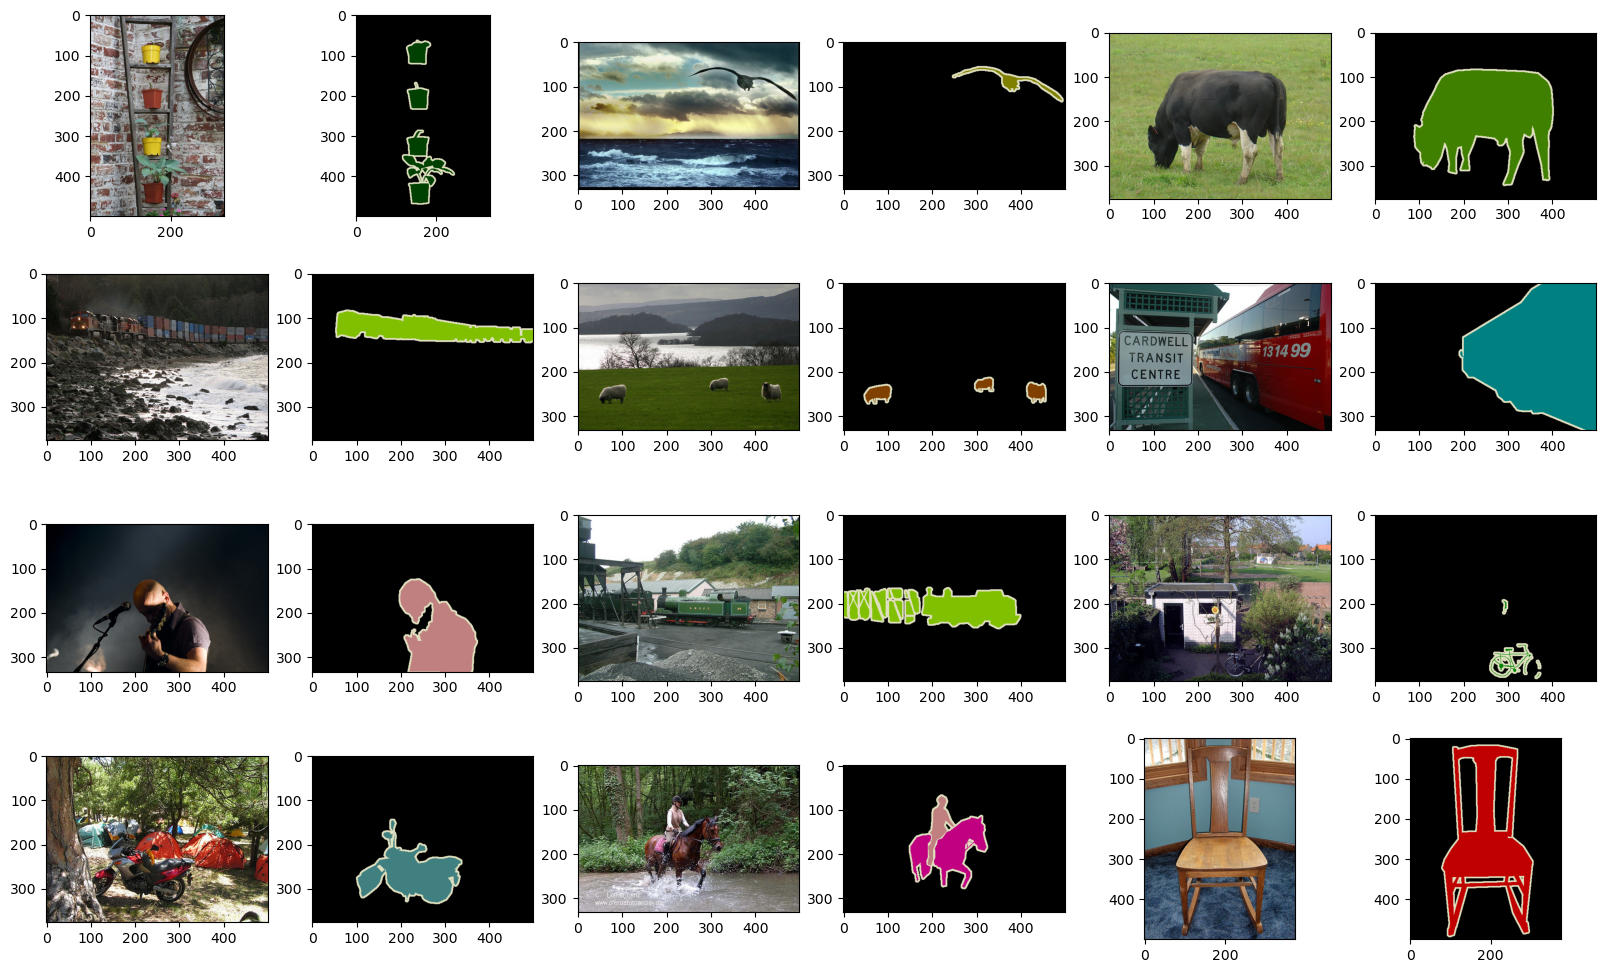

In [7]:
### visualise our data
fig, axs = plt.subplots(4,6,figsize=(20,12))
axs=axs.flatten()
for ii_r,r in enumerate(records[0:12]):
    img = imread(r['image'])
    ann = imread(r['annotation'])
    axs[2*ii_r].imshow(img)
    axs[2*ii_r+1].imshow(ann)
plt.show()

In [8]:
imread(records[0]['annotation']).shape

(500, 333, 4)

Ah. So all our annotations are in 4d (RGBA) pngs! That's annoying!

### Step 3: Build our generators

As before, our generator will need to load our data and preprocess it. In this case, it will also need to load our annotations as images, and then convert them to a mask that we can use as a training target.

In [9]:
### We can conveniently find the colormap that VOC2012 uses to label its objects: https://albumentations.ai/docs/autoalbument/examples/pascal_voc/
VOC_COLORMAP = {
    "background":    [0, 0, 0],
    "aeroplane":    [128, 0, 0],
    "bicycle":    [0, 128, 0],
    "bird":    [128, 128, 0],
    "boat":    [0, 0, 128],
    "bottle":    [128, 0, 128],
    "bus":    [0, 128, 128],
    "car":    [128, 128, 128],
    "cat":    [64, 0, 0],
    "chair":    [192, 0, 0],
    "cow":    [64, 128, 0],
    "diningtable":    [192, 128, 0],
    "dog":    [64, 0, 128],
    "horse":    [192, 0, 128],
    "motorbike":    [64, 128, 128],
    "person":    [192, 128, 128],
    "potted plant":    [0, 64, 0],
    "sheep":    [128, 64, 0],
    "sofa":    [0, 192, 0],
    "train":    [128, 192, 0],
    "tv/monitor":    [0, 64, 128],
}

In [10]:
### let's use our colormap to make a mask-generating function
def get_mask(image):
    # image: an 3d (WxHxRGBA) numpy array of the annotation image
    
    height, width = image.shape[:2]
    segmentation_mask = np.zeros((height, width, len(VOC_COLORMAP.keys())), dtype=np.float32)
    for label_index, (key, rgb_value) in enumerate(VOC_COLORMAP.items()):
        segmentation_mask[:, :, label_index] = np.all(image == rgb_value, axis=-1).astype(float)
    return segmentation_mask

image 358: [{'class: 0', 'label: background'}, {'label: sheep', 'class: 17'}]


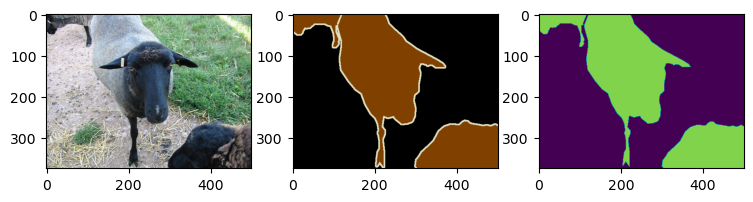

image 2882: [{'class: 0', 'label: background'}, {'label: car', 'class: 7'}, {'class: 8', 'label: cat'}]


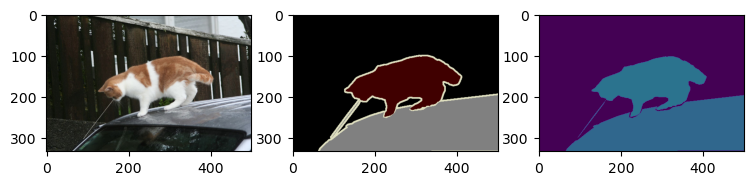

image 2584: [{'class: 0', 'label: background'}, {'class: 8', 'label: cat'}]


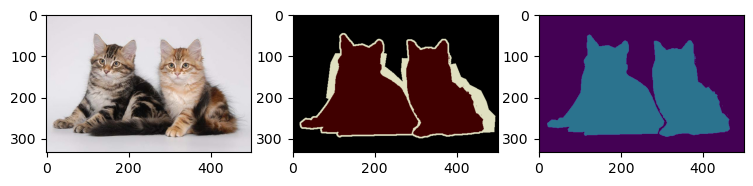

In [11]:
### let's inspect our masks to make sure they're generating properly
for ii in np.random.choice(len(records),3):
    fig, axs = plt.subplots(1,3,figsize=(9,3))
    img = imread(records[ii]['image'])
    ann = imread(records[ii]['annotation'])
    mask = get_mask(ann[:,:,0:3])   # need to drop the last channel (the alpha/transparency channel)
    axs[0].imshow(img)
    axs[1].imshow(ann)
    axs[2].imshow(mask.argmax(axis=-1), vmax=21, vmin=0) # use argmax to revert from one-hot to logit encoding
    print (f'image {ii}:',[{f'class: {jj}',f'label: {list(VOC_COLORMAP.keys())[jj]}'} for jj in np.unique(mask.argmax(axis=-1))])
    plt.show()

In [12]:
def voc2012_generator(records, output_shape=(200,200), mode='random_crop'):
    ### a wrapper for our generator. Takes all our parameters and returns the generator.

    def _generator():
        ### The internal generator must not take any parameters.

        for r in records:

            # io
            x = (imread(r['image'])).astype(np.float32)  # <- again, don't normalise.
            ann = imread(r['annotation'])[:,:,0:3]       # drop the alpha channel
            y = get_mask(ann)                            # WHC, float32

            # reduce dimension of array
            if mode=='resize':
                x = resize(x,output_shape)
                y = resize(y,output_shape)
            elif mode=='random_crop':
                crop_width = [(0,0)]*3
                pad_width  = [(0,0)]*3
                for ax in [0,1]:
                    if x.shape[ax]>output_shape[ax]:
                        crop_val=np.random.choice(x.shape[ax]-output_shape[ax])
                        crop_width[ax] = (crop_val, x.shape[ax]-output_shape[ax]-crop_val)
                    elif x.shape[ax]<output_shape[ax]:
                        pad_val = np.random.choice(output_shape[ax]-x.shape[ax])
                        pad_width[ax] = (pad_val,output_shape[ax]- x.shape[ax]-pad_val)
                        
                x = crop(x, crop_width)
                x = pad(x, pad_width)
                y = crop(y, crop_width)
                y = pad(y, pad_width)

            yield tf.convert_to_tensor(x), tf.convert_to_tensor(y)
            
    return _generator

In [13]:
trn_split=0.7
val_split=0.9

In [14]:
generator_obj_trn = voc2012_generator(
    records[0:int(trn_split*len(records))], 
    output_shape=(224,224), 
    mode='resize'
)
generator_obj_val = voc2012_generator(
    records[int(trn_split*len(records)):int(val_split*len(records))], 
    output_shape=(224,224), 
    mode='resize'
)
generator_obj_test = voc2012_generator(
    records[int(val_split*len(records)):], 
    output_shape=(224,224), 
    mode='resize'
)

In [15]:
ds_voc_trn = (
    tf.data.Dataset.from_generator(
     generator_obj_trn,
     output_signature=(
         tf.TensorSpec(shape=(224,224,3), dtype=tf.float32),
         tf.TensorSpec(shape=(224,224,21), dtype=tf.float32)))  # <- new shape!
    ) \
    .cache().batch(64).prefetch(tf.data.experimental.AUTOTUNE)

ds_voc_val = (
    tf.data.Dataset.from_generator(
     generator_obj_val,
     output_signature=(
         tf.TensorSpec(shape=(224,224,3), dtype=tf.float32),
         tf.TensorSpec(shape=(224,224,21), dtype=tf.float32)))  # <- new shape
    ) \
    .cache().batch(64).prefetch(tf.data.experimental.AUTOTUNE)

ds_voc_test = (
    tf.data.Dataset.from_generator(
     generator_obj_test,
     output_signature=(
         tf.TensorSpec(shape=(224,224,3), dtype=tf.float32),
         tf.TensorSpec(shape=(224,224,21), dtype=tf.float32)))  # <- new shape
    ) \
    .cache().batch(64).prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
def vgg16_premapper(_x, _y):                     # sample and target are now tf tensors
    return tf.keras.applications.vgg16.preprocess_input(_x), _y      # return the (image, label) tuple

In [17]:
ds_voc_trn = ds_voc_trn.map(vgg16_premapper, num_parallel_calls=tf.data.experimental.AUTOTUNE) 
ds_voc_val = ds_voc_val.map(vgg16_premapper, num_parallel_calls=tf.data.experimental.AUTOTUNE) 
ds_voc_test = ds_voc_test.map(vgg16_premapper, num_parallel_calls=tf.data.experimental.AUTOTUNE) 

In [18]:
a,b = next(ds_voc_trn.as_numpy_iterator())

In [19]:
a.shape, a.max(), a.min(), b.shape, b.max(), b.min()

((64, 224, 224, 3), 151.061, -123.68, (64, 224, 224, 21), 1.0, 0.0)

### Step 4: Build our model

Let's build a fully convolutional neural network for our semantic segmentation problem. We'll want a pretrained _encoder_ and then we'll train a _decoder_ using our new data. We'll add a _header_ to do the final mapping to the output classes.

In [20]:
vgg_encoder = tf.keras.applications.VGG16(
    include_top=False, 
    input_shape=(224,224,3),
    weights='imagenet', 
    pooling=None,         # <- in this case, we don't want any pooling on our final outputs
)

In [21]:
# as before, let's make our encoder not trainable.
vgg_encoder.trainable = False

In [22]:
vgg_encoder.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
# make a function to build our upblocks flexible to the number of filters
def UpBlock(n_filters, n_blocks):
    block_layers = []
    
    for _ in range(n_blocks):
        block_layers.append(tf.keras.layers.Activation('relu'))
        block_layers.append(tf.keras.layers.Conv2DTranspose(n_filters, 3, padding="same"))
        block_layers.append(tf.keras.layers.BatchNormalization())
        
    # and add the upsampling layer
    block_layers.append(tf.keras.layers.UpSampling2D(2))
    
    return block_layers

In [24]:
decoder = tf.keras.models.Sequential(
    [tf.keras.layers.UpSampling2D(2, input_shape=(7,7,512))] 
    + UpBlock(n_filters=256,n_blocks=1)
    + UpBlock(128,1)
    + UpBlock(64,1)
    + UpBlock(32,1),
    name='decoder'
)

In [25]:
header = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding="same", input_shape=(224,224,32)), 
    tf.keras.layers.Conv2D(21, 1, padding="same", activation='softmax')
], name='header')

In [26]:
header.summary()

Model: "header"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      9248      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 21)      693       
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [27]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 14, 14, 512)       0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 256)       1179904   
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 256)       1024      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 256)       0         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       2950

In [28]:
model = tf.keras.models.Sequential([
    vgg_encoder,
    decoder,
    header
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
decoder (Sequential)         (None, 224, 224, 32)      1569120   
_________________________________________________________________
header (Sequential)          (None, 224, 224, 21)      9941      
Total params: 16,293,749
Trainable params: 1,578,101
Non-trainable params: 14,715,648
_________________________________________________________________


### Step 5: Train!

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                          
    loss=tf.keras.losses.CategoricalCrossentropy(), #<- in this case, classes are one-hot encoded
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [31]:
model.fit(
    ds_voc_trn,
    epochs=5,
    validation_data=ds_voc_val,
)

Epoch 1/5
32/32 [==============================] - 861s 26s/step - loss: 1.6911 - categorical_accuracy: 0.6471 - val_loss: 14.7482 - val_categorical_accuracy: 0.1532
Epoch 2/5
32/32 [==============================] - 38s 1s/step - loss: 0.6837 - categorical_accuracy: 0.8272 - val_loss: 3.8629 - val_categorical_accuracy: 0.5857
Epoch 3/5
32/32 [==============================] - 39s 1s/step - loss: 0.5317 - categorical_accuracy: 0.8422 - val_loss: 1.5206 - val_categorical_accuracy: 0.7351
Epoch 4/5
32/32 [==============================] - 39s 1s/step - loss: 0.4423 - categorical_accuracy: 0.8584 - val_loss: 0.7096 - val_categorical_accuracy: 0.8336
Epoch 5/5
32/32 [==============================] - 39s 1s/step - loss: 0.3936 - categorical_accuracy: 0.8706 - val_loss: 0.6458 - val_categorical_accuracy: 0.8335


### Step 6: Inspect and Analyse

In [32]:
X, Y = next(ds_voc_val.as_numpy_iterator())

In [33]:
Y_hat = model.predict(X)

In [34]:
### due to VGG preprocessing, we need to recover our initial image.
# https://stackoverflow.com/questions/55987302/reversing-the-image-preprocessing-of-vgg-in-keras-to-return-original-image
def deprocess_img(processed_img):
    x = processed_img.copy()
  
    # perform the inverse of the preprocessiing step
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

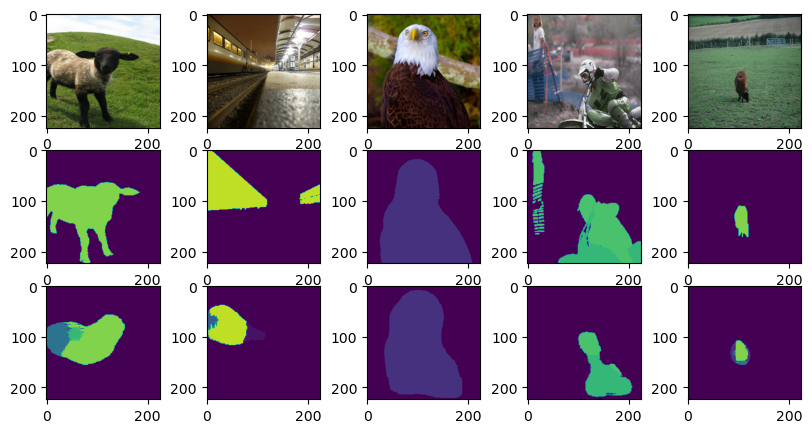

In [37]:
### let's inspect our masks to make sure they're generating properly
N = 5
fig, axs = plt.subplots(3,N,figsize=(N*2,N))
for ii, ii_r in enumerate(np.random.choice(X.shape[0],N)):
    axs[0,ii].imshow(deprocess_img(X[ii_r,:,:,:]))
    axs[1,ii].imshow(Y[ii_r,...].argmax(axis=-1), vmax=21, vmin=0) # use argmax to revert from one-hot to logit encoding
    axs[2,ii].imshow(Y_hat[ii_r,...].argmax(axis=-1), vmax=21, vmin=0) # use argmax to revert from one-hot to logit encoding
plt.show()

Okay so it looks like we're doing okay with the class identification, but not the shape.

### Step 7: Iterate
Let's try some U-Net-like bridging connections from low-level encoder features.

In [38]:
def make_model():
    
    # don't need to get the last maxpool layer
    encoder_output = vgg_encoder.get_layer('block5_conv3').output
    
    # get the featuremaps from the encoder so we can bridge them to the decoder
    block1_featuremap = vgg_encoder.get_layer('block1_conv2').output  # 224x224
    block2_featuremap = vgg_encoder.get_layer('block2_conv2').output  # 112x112
    
    # VGG doesn't have batch norm so let's do it ourselves:
    block1_featuremap = tf.keras.layers.Activation('relu')(block1_featuremap)
    block1_featuremap = tf.keras.layers.BatchNormalization()(block1_featuremap)
    block2_featuremap = tf.keras.layers.Activation('relu')(block2_featuremap)
    block2_featuremap = tf.keras.layers.BatchNormalization()(block2_featuremap)
    
    # the decoder with bridging:
    x = tf.keras.models.Sequential(UpBlock(128,2))(encoder_output)      # 28x28
    x = tf.keras.models.Sequential(UpBlock(64,2))(x)                   # 56x56
    x = tf.keras.models.Sequential(UpBlock(32,2))(x)                    # 112x112
    x = tf.keras.layers.Concatenate()([block2_featuremap,x])          # 112x112
    x = tf.keras.models.Sequential(UpBlock(32,2))(x)                    # 224x224
    x = tf.keras.layers.Concatenate()([block1_featuremap,x])          # 224x224
    
    # add some header layers:
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(32, 3, padding="same")(x)
    output = tf.keras.layers.Conv2D(21, 1, padding="same", activation='softmax')(x)

    return tf.keras.models.Model(vgg_encoder.input, output)

In [39]:
model = make_model()

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                          
    loss=tf.keras.losses.CategoricalCrossentropy(), #<- in this case, classes are one-hot encoded
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [42]:
model.fit(
    ds_voc_trn,
    epochs=5,
    validation_data=ds_voc_val,
)

Epoch 1/5
32/32 [==============================] - 63s 2s/step - loss: 1.6185 - categorical_accuracy: 0.6113 - val_loss: 3.9719 - val_categorical_accuracy: 0.4744
Epoch 2/5
32/32 [==============================] - 54s 2s/step - loss: 0.7886 - categorical_accuracy: 0.7705 - val_loss: 1.6923 - val_categorical_accuracy: 0.6200
Epoch 3/5
32/32 [==============================] - 54s 2s/step - loss: 0.6383 - categorical_accuracy: 0.7999 - val_loss: 1.1082 - val_categorical_accuracy: 0.7022
Epoch 4/5
32/32 [==============================] - 54s 2s/step - loss: 0.5530 - categorical_accuracy: 0.8230 - val_loss: 0.9435 - val_categorical_accuracy: 0.7439
Epoch 5/5
32/32 [==============================] - 54s 2s/step - loss: 0.5729 - categorical_accuracy: 0.8243 - val_loss: 0.8681 - val_categorical_accuracy: 0.7499


In [43]:
X, Y = next(ds_voc_val.as_numpy_iterator())

In [44]:
Y_hat = model.predict(X)

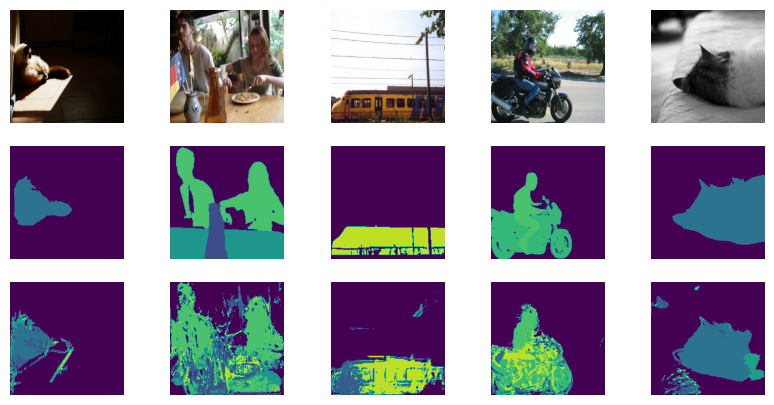

In [46]:
### let's inspect our masks to see how they're doing now
N = 5
fig, axs = plt.subplots(3,N,figsize=(N*2,N))
for ii, ii_r in enumerate(np.random.choice(X.shape[0],N, replace=False)):
    axs[0,ii].imshow(deprocess_img(X[ii_r,:,:,:]))
    axs[1,ii].imshow(Y[ii_r,...].argmax(axis=-1), vmax=21, vmin=0) # use argmax to revert from one-hot to logit encoding
    axs[2,ii].imshow(Y_hat[ii_r,...].argmax(axis=-1), vmax=21, vmin=0) # use argmax to revert from one-hot to logit encoding
    for jj in range(3):
        axs[jj,ii].axis('off')
plt.show()

### Step 8: Evaluate

In [65]:
### Let's get the confusion matrix for the test set
cs = []
for X, Y in ds_voc_test:
    Y_hat = model.predict(X)
    C = confusion_matrix(Y.numpy().argmax(axis=-1).flatten(), Y_hat.argmax(axis=-1).flatten())
    cs.append(C)

In [66]:
confusion_arr = np.array(cs).sum(axis=0)

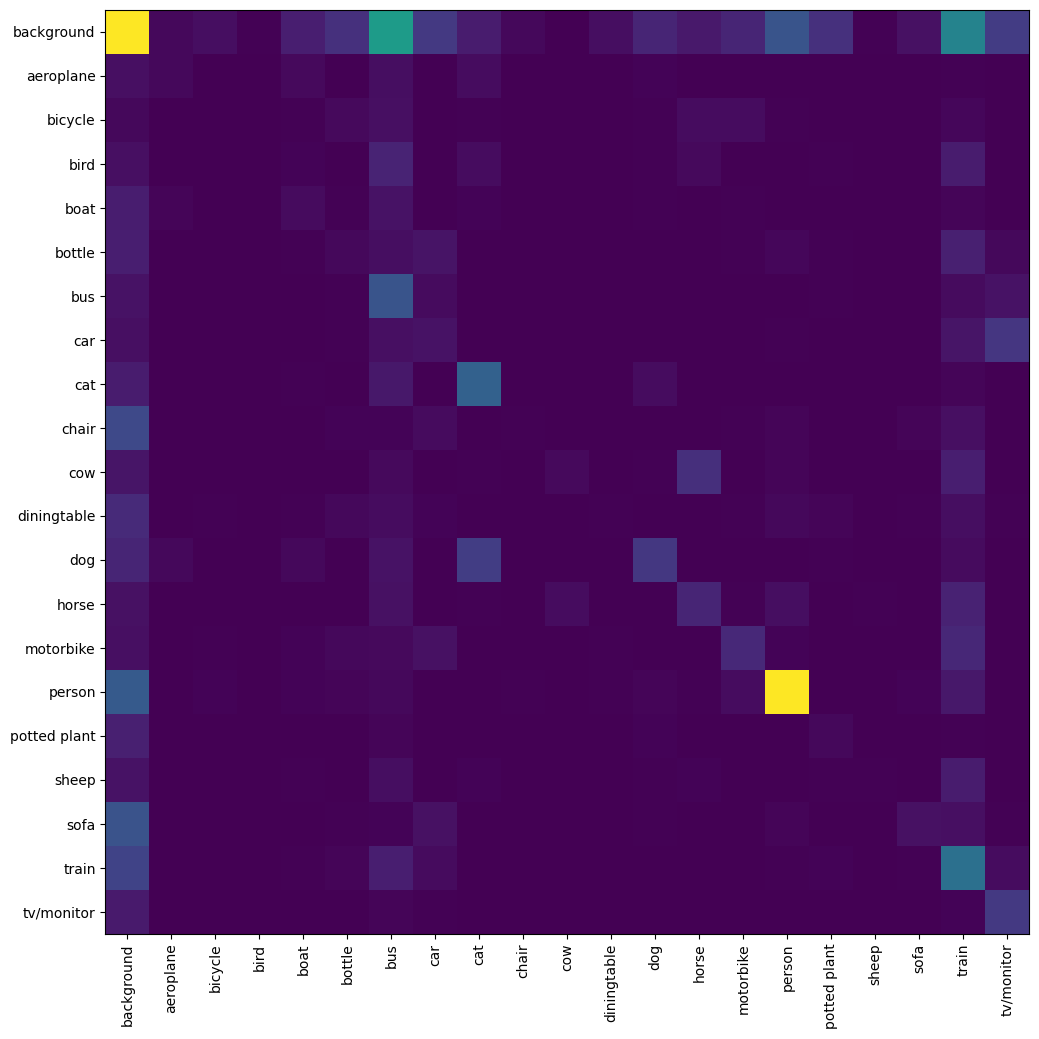

In [67]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
vmax = confusion_arr[1:,1:].max()
ax.imshow(confusion_arr, vmax=vmax)
ax.set_yticks(range(len(VOC_COLORMAP.keys())))
ax.set_yticklabels(list(VOC_COLORMAP.keys()))
ax.set_xticks(range(len(VOC_COLORMAP.keys())))
ax.set_xticklabels(list(VOC_COLORMAP.keys()), rotation=90)
plt.show()

## Tutorial: Machine Learning Experiments

We've seen that designing a powerful machine learning system requires a combination of intuition, experimentation, and computational resource. How can we systematically track the ML experiments we run? How can we keep an eye on them as they progress?

Let's introduce two new libraries: `sacred` and `tensorboard`.

[Sacred](https://sacred.readthedocs.io/en/stable/quickstart.html) is an open-source machine learning experimentation framework that allows users to track their experiments and retain their configurations and results.

[TensorBoard](https://www.tensorflow.org/tensorboard) is a visualisation toolkit that allows users to watch their models training in real-time, and log and visualise training progress.

We may also want to write a training loop from scratch. For more complicated models and loss functions, and monitoring with Sacred and Tensorboard, we need to build our own training loop.